# Task 4 :- To Explore Decision Tree Algorithm
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.¶

In [73]:
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [71]:
# loading the data
data = pd.read_csv('Iris.csv')

### Data Analysis

In [72]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
data.shape

(150, 6)

In [62]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [63]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### Data Visualisation

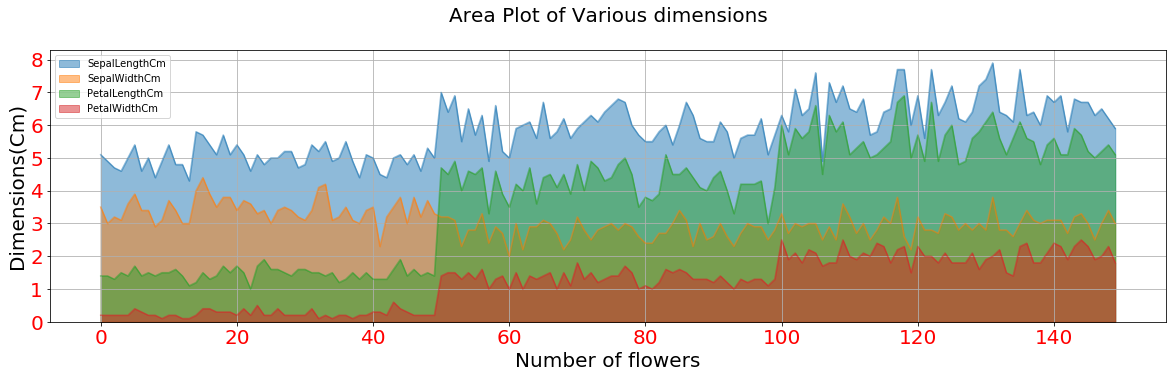

In [64]:
data.plot.area(y=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],figsize= (20,5),stacked = False )

plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Area Plot of Various dimensions' '\n',color='black',size = 20)
plt.xlabel('Number of flowers',color='black',size = 20)
plt.ylabel('Dimensions(Cm)',color='black',size = 20)
plt.grid()
plt.show()


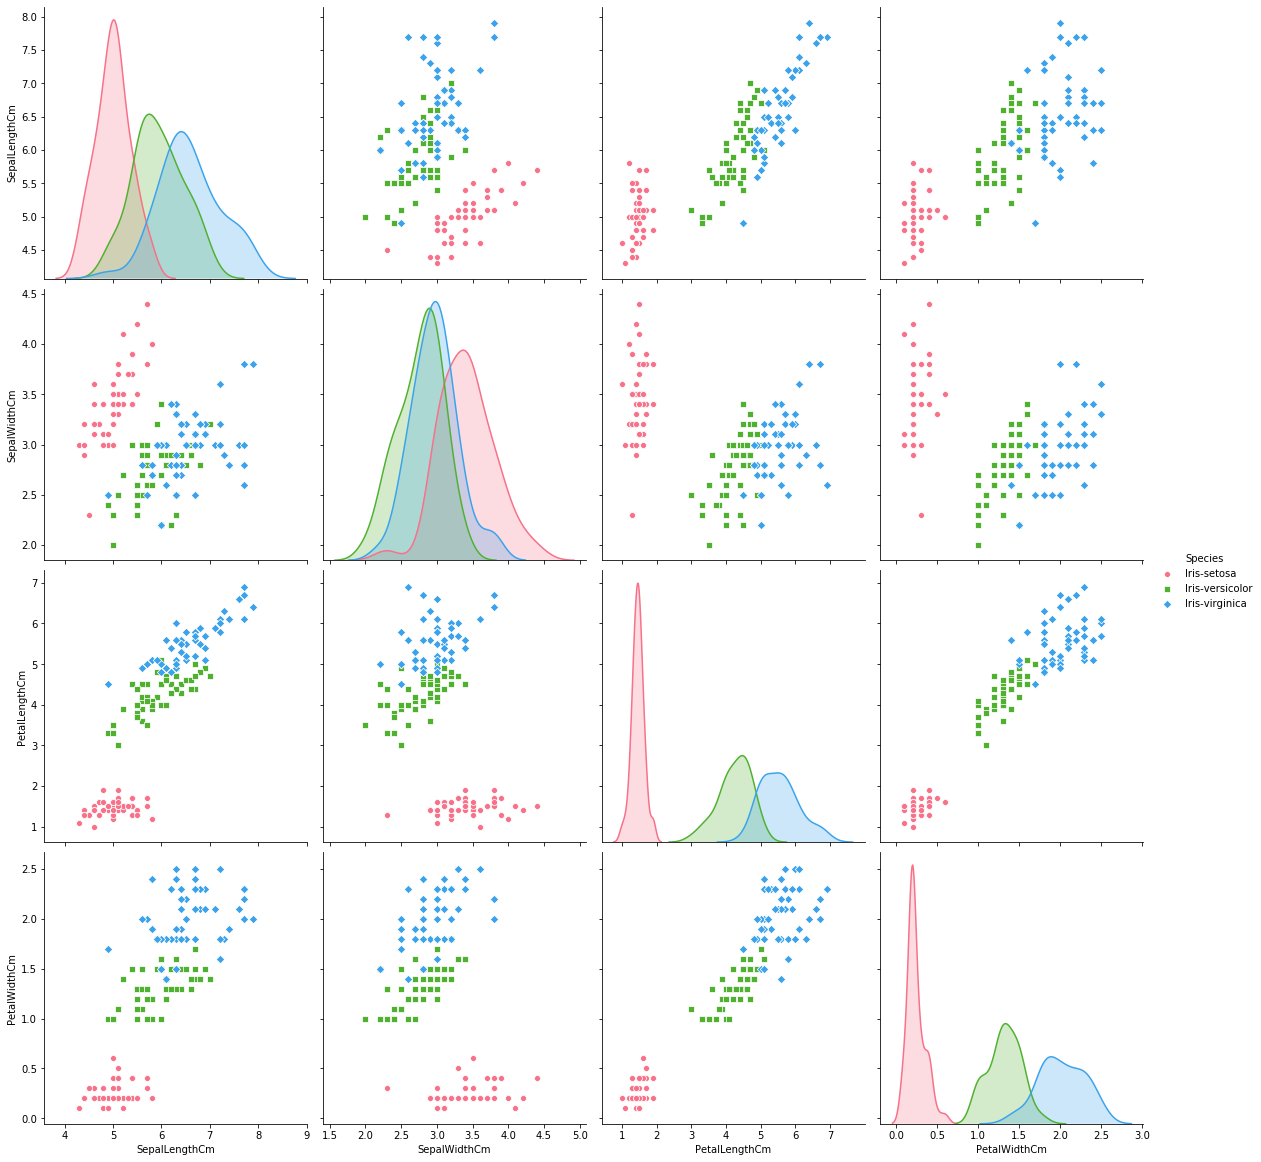

In [65]:
data.drop('Id',axis=1,inplace = True)
sea.pairplot(data = data, hue = 'Species',palette="husl",markers=["o", "s", "D"],height=4)
plt.show()

### Decision Tree Plot

In [66]:
data_t= data['Species'].to_numpy()
y = LabelEncoder().fit_transform(data_t)

In [67]:
data=data.drop('Species',axis = 1)
x_train, x_test, y_train, y_test  = train_test_split(data, y, test_size = 0.2, random_state = 3)
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

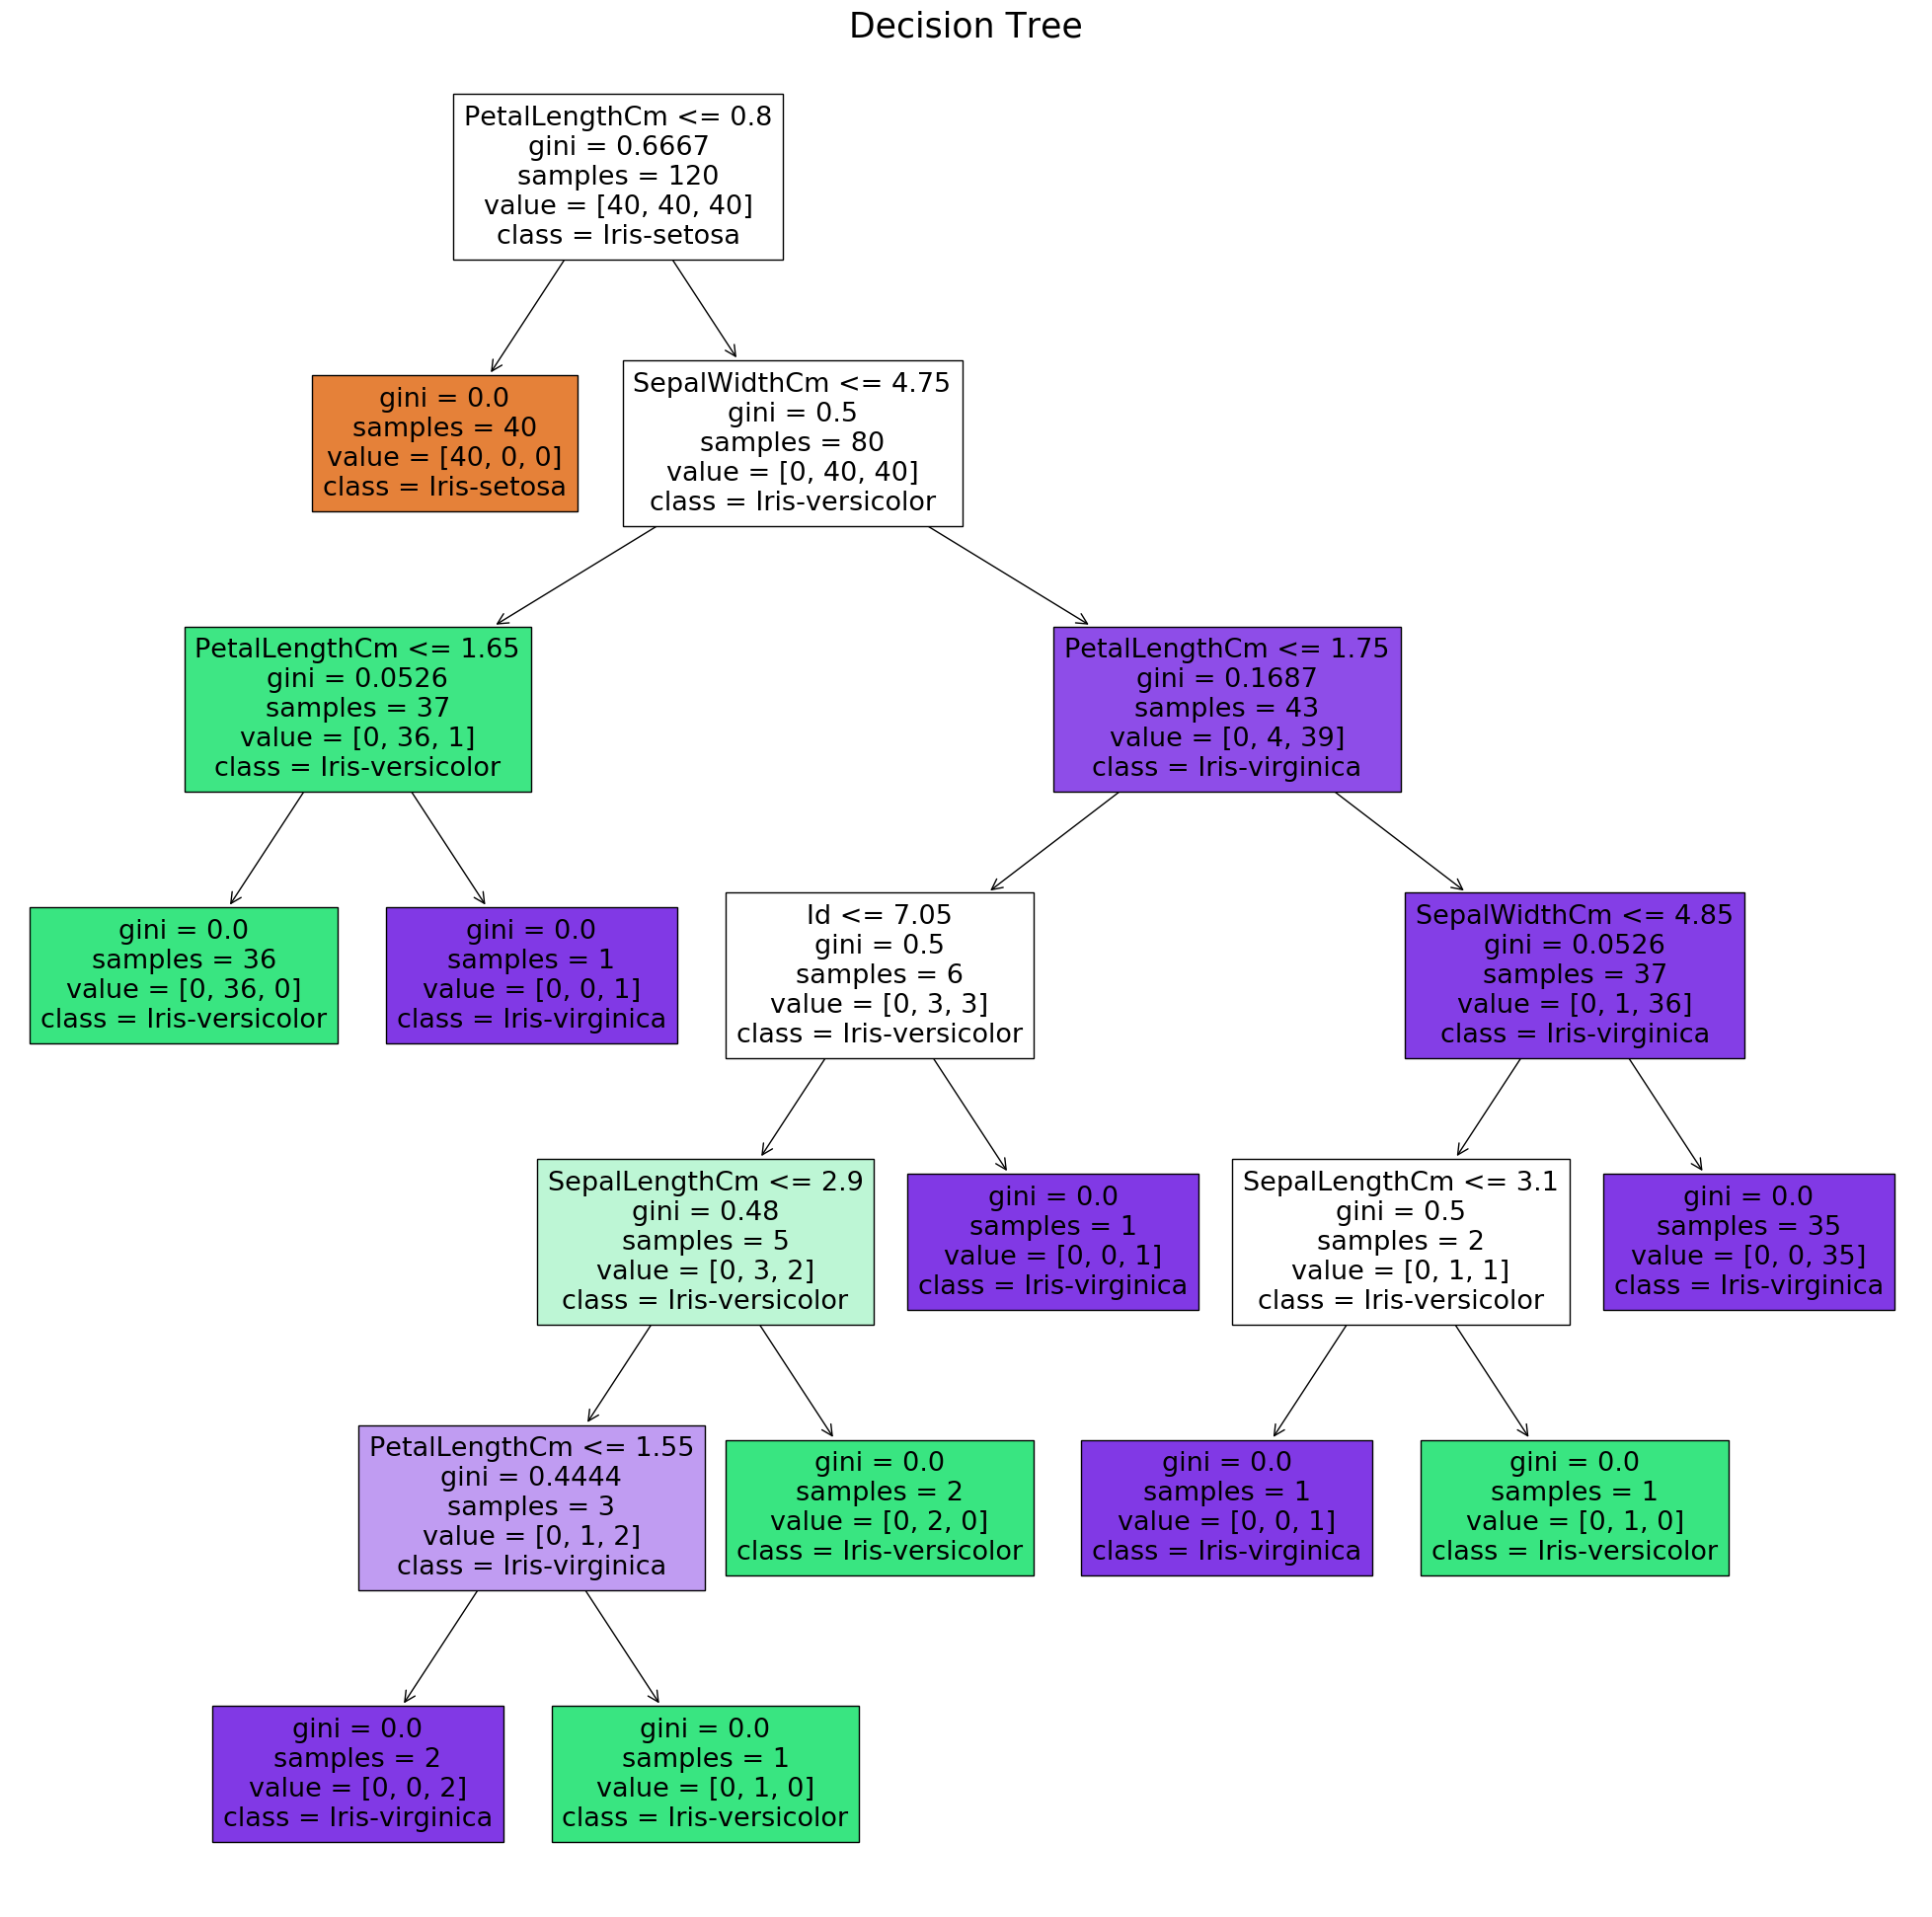

In [74]:
plt.figure(figsize = (25,25),dpi = 100)
tree_plot= plot_tree(Decision_Tree_Classifier,feature_names = data.columns,class_names = data['Species'].unique().tolist(),precision = 4,label='all',filled = True)
plt.title('Decision Tree',color='black',size = 25)
plt.show()

In [77]:
pred = Decision_Tree_Classifier.predict(x_test)
pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 1])

### Accuracy Calculation

In [78]:
accuracy_score(y_test, pred)

0.9333333333333333